In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import os
% matplotlib inline
rc('text', usetex=True)
rc('font', family='serif')

In [14]:
ab = str(raw_input("Model: "))
model = ab + "_millennium"
path = "/home/esteban/Escritorio/Practica/Data/" + model
os.chdir( path )

Model: G13


In [ ]:
# =================== Correlation function ======================================
bins,logxi1 = np.loadtxt('xi_data_5.txt',unpack=True)
bins,logxi2 = np.loadtxt('xi_data_6.txt',unpack=True)
bins,logxi3 = np.loadtxt('xi_data_7.txt',unpack=True)
bins,logxi4 = np.loadtxt('xi_data_8.txt',unpack=True)
rho1, rho2, rho3, rho4 = -3.5, -3, -2.5, -2

path = "/home/esteban/Escritorio/Practica/Plots/" + model
os.chdir( path )

f = plt.figure()
#plt.title(r"$n = 10^{%.1f} /h^{-3} Mpc^3$" %rho)
plt.plot(bins,logxi1, 'g-', lw = .5, label = r"$n = 10^{%.1f} /h^{-3} Mpc^3$" %rho1)
plt.plot(bins,logxi2, 'r-', lw = .5, label = r"$n = 10^{%.1f} /h^{-3} Mpc^3$" %rho2)
plt.plot(bins,logxi3, 'b-', lw = .5, label = r"$n = 10^{%.1f} /h^{-3} Mpc^3$" %rho3)
plt.plot(bins,logxi4, 'k-', lw = .5, label = r"$n = 10^{%.1f} /h^{-3} Mpc^3$" %rho4)
plt.ylim(-1,6)
plt.xlabel("$log(d/h^{-1}Mpc)$", fontsize = 14)
plt.ylabel(r"$log(\xi)$", fontsize = 14)
plt.legend(loc = (.53,.53),title = r"\large{SFR}", frameon = False, prop={'size':12})
plt.annotate(r"\large{\textbf{%s}}" %ab, xy=(0.06,0.1), xycoords='axes fraction' )
plt.minorticks_on()
f.savefig('xi_sfr.pdf')

In [12]:
(1e-1 - 1e-2)/2

0.045000000000000005

(11, 15)

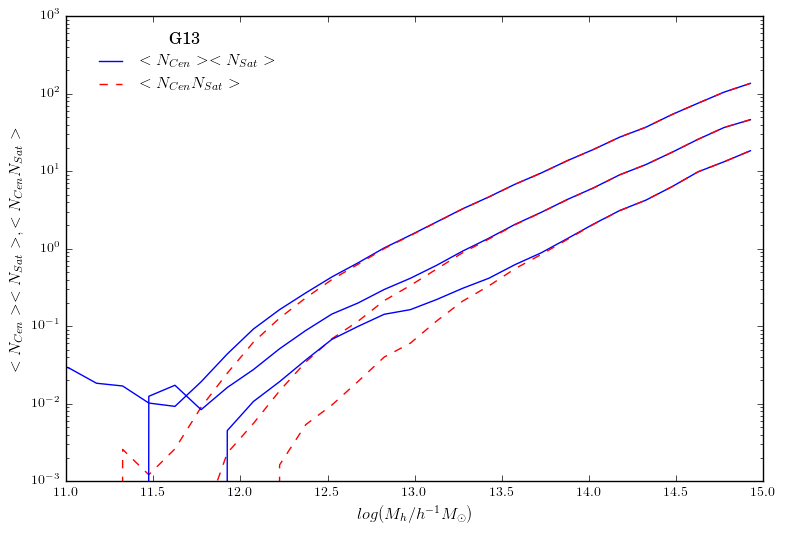

In [16]:
# ======================== TEST OF ASUMPTION ========================================
bins,ICS1, ACS1 = np.loadtxt('test_assumption_01',unpack=True)
bins,ICS2, ACS2 = np.loadtxt('test_assumption_02',unpack=True)
bins,ICS3, ACS3 = np.loadtxt('test_assumption_03',unpack=True)
rho1, rho2, rho3 = -1.5, -2.0, -2.5

#path = "/home/esteban/Escritorio/Practica/Plots/" + model
#os.chdir( path )

f = plt.figure(figsize =[9,6])
plt.plot(bins, ICS1, 'b-', label = r"$<N_{Cen}><N_{Sat}>$")
plt.plot(bins, ACS1, 'r--', label = r"$<N_{Cen}N_{Sat}>$")

plt.plot(bins, ICS2, 'b-')
plt.plot(bins, ACS2, 'r--')

plt.plot(bins, ICS3, 'b-')
plt.plot(bins, ACS3, 'r--')

plt.yscale('log')
plt.ylim(1e-3, 1e3)
plt.xlabel(r"$log(M_h / h^{-1}M_{\odot})$", fontsize = 12)
plt.ylabel(r"$<N_{Cen}><N_{Sat}>, <N_{Cen}N_{Sat}>$", fontsize = 12)
plt.legend(loc = (.03,.82),title = r"\large{G13}", frameon = False, prop={'size':12})
#plt.annotate(r"$n/h^{3}Mpc^{-3}$\\ $=10^{%.1f}$" %rho1, xy=(0.1,0.1), xycoords='axes fraction' )
#plt.annotate(r"$n/h^{3}Mpc^{-3}$\\$=10^{%.1f}$" %rho2, xy=(0.38,0.1), xycoords='axes fraction' )
#plt.annotate(r"$n/h^{3}Mpc^{-3}$\\$=10^{%.1f}$" %rho3, xy=(0.55,0.1), xycoords='axes fraction' )
plt.xlim(11,15)
#f.savefig("Test_Assumption.pdf")

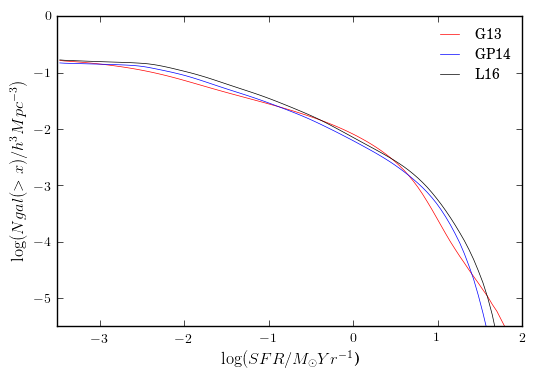

In [6]:
# ================================ CSMF or CSMASS ==========================================
import glob as G
prop = ['r-', 'b-', 'k-']
ab = ['G13', 'GP14', 'L16']
f = plt.figure()
for i,ab in enumerate(ab):
    model = ab + "_millennium"
    path = "/home/esteban/Escritorio/Practica/Data/" + model
    os.chdir( path )
    bins, CF = np.loadtxt(G.glob('CSFR*.txt')[0], unpack=True)
    plt.plot(bins, CF, prop[i], lw = .5, label = ab)
    
plt.xlim(-3.5, 2)
plt.ylim(-5.5,0)
#plt.xlim(6.5, 11.5)
#plt.ylim(-4,0)

plt.xlabel(r"$\log(SFR/M_{\odot}Yr^{-1}$)", fontsize = 12)
plt.ylabel(r"$\log(Ngal (> x)/h^3 Mpc^{-3})$ ", fontsize = 12)
#plt.xlabel(r"$\log(M_{*} / h^{-1}M_{\odot})$", fontsize = 12)
#plt.ylabel(r"$\log(Ngal (> x) /h^{3} Mpc^{-3})$ ", fontsize = 12)

plt.legend(loc='upper right', frameon = False, prop={'size':10})
path = "/home/esteban/Escritorio/Practica/Plots"
os.chdir( path )
f.savefig("CSFR.pdf")